In [ ]:
# Nama      : Putu Indra Mahendra
# NRP       : 5025221215
# Project   : Prediction House Price in Jakarta

In [29]:
# Import data analysis tools 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

print(f"pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"matplotlib version: {matplotlib.__version__}") 

pandas version: 2.0.3
NumPy version: 1.24.4
matplotlib version: 3.7.5


In [ ]:
# Baca data
df = pd.read_csv('data/HARGA_RUMAH_JAKSEL.csv', header=1)

In [31]:
df.head()

,HARGA,LT,LB,JKT,JKM,GRS,KOTA
0,"28,000,000,000",1100,700,5,6,ADA,JAKSEL
1,"19,000,000,000",824,800,4,4,ADA,JAKSEL
2,"4,700,000,000",500,400,4,3,ADA,JAKSEL
3,"4,900,000,000",251,300,5,4,ADA,JAKSEL
4,"28,000,000,000",1340,575,4,5,ADA,JAKSEL


In [32]:
print("Kolom dalam DataFrame:", df.columns.tolist())
price_col = [col for col in df.columns if 'HARGA' in col.upper()][0]
print(f"Menggunakan kolom harga: {price_col}\n")


# Hapus karakter non-digit, ubah ke numeric, lalu konversi ke int (tanpa decimal)
df[price_col] = (
    df[price_col]
    .astype(str)
    .str.replace(r'[^0-9]', '', regex=True)
    .pipe(pd.to_numeric, errors='coerce')
    .fillna(0)
    .astype(int)
)
df.info()

Kolom dalam DataFrame: ['HARGA', 'LT', 'LB', 'JKT', 'JKM', 'GRS', 'KOTA']
Menggunakan kolom harga: HARGA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   HARGA   1001 non-null   int64 
 1   LT      1001 non-null   int64 
 2   LB      1001 non-null   int64 
 3   JKT     1001 non-null   int64 
 4   JKM     1001 non-null   int64 
 5   GRS     1001 non-null   object
 6   KOTA    1001 non-null   object
dtypes: int64(5), object(2)
memory usage: 54.9+ KB


In [33]:
#Mengganti satuan harga agar lebih readable
df['HARGA'] = (df['HARGA']/1000000).astype(int)

In [34]:
# menghapus feature kota karena semua data berasal dari JAKSEL
df = df.drop(columns=['KOTA'])
df.head()


,HARGA,LT,LB,JKT,JKM,GRS
0,28000,1100,700,5,6,ADA
1,19000,824,800,4,4,ADA
2,4700,500,400,4,3,ADA
3,4900,251,300,5,4,ADA
4,28000,1340,575,4,5,ADA


### Data Analysis 

In [35]:
df.describe()


,HARGA,LT,LB,JKT,JKM
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,17474.719281,530.504496,487.275724,4.457542,3.940060
std,20795.482161,531.069773,452.872262,2.004606,1.903261
min,430.000000,22.000000,38.000000,1.000000,1.000000
25%,6750.000000,220.000000,300.000000,4.000000,3.000000
50%,13500.000000,400.000000,411.000000,4.000000,4.000000
75%,20000.000000,677.000000,600.000000,5.000000,4.000000
max,250000.000000,6790.000000,10000.000000,27.000000,27.000000


In [36]:
print("Jumlah data duplicated:", df.duplicated().sum(), end="")

Jumlah data duplicated: 70

In [37]:
df.drop_duplicates(inplace=True)
print("Jumlah data duplicated:", df.duplicated().sum(), end="")

Jumlah data duplicated: 0

In [38]:
# Cek Nilai Hilang
print("Jumlah nilai hilang per kolom:")
print(df.isnull().sum(), end="\n\n")


Jumlah nilai hilang per kolom:
HARGA    0
LT       0
LB       0
JKT      0
JKM      0
GRS      0
dtype: int64



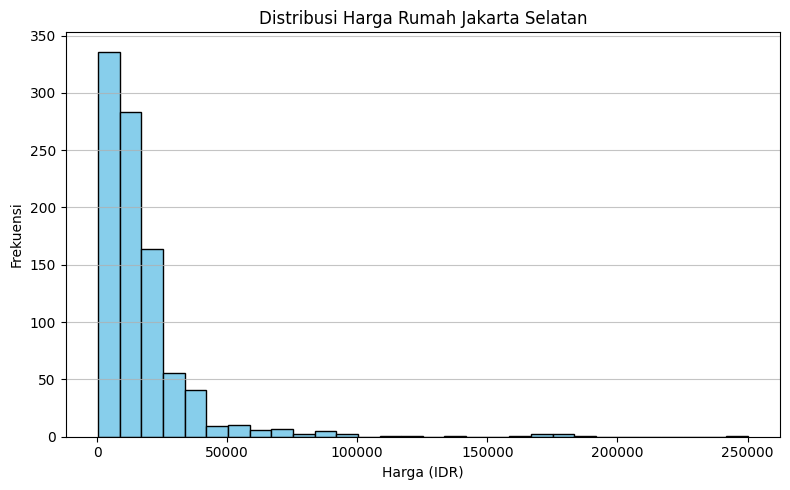

In [39]:
# df.HARGA.plot.hist();
# 3. Plot histogram distribusi harga
plt.figure(figsize=(8, 5))
plt.hist(df[price_col], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribusi Harga Rumah Jakarta Selatan')
plt.xlabel('Harga (IDR)')
plt.ylabel('Frekuensi')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

/tmp/ipykernel_12672/1229596645.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x=column, palette=color_palette, order=top_10_items)
/tmp/ipykernel_12672/1229596645.py:15: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=filtered_df, x=column, palette=color_palette, order=top_10_items)
/tmp/ipykernel_12672/1229596645.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x=column, palette=color_palette, order=top_10_items)
/tmp/ipykernel_12672/1229596645.py:15: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, whic

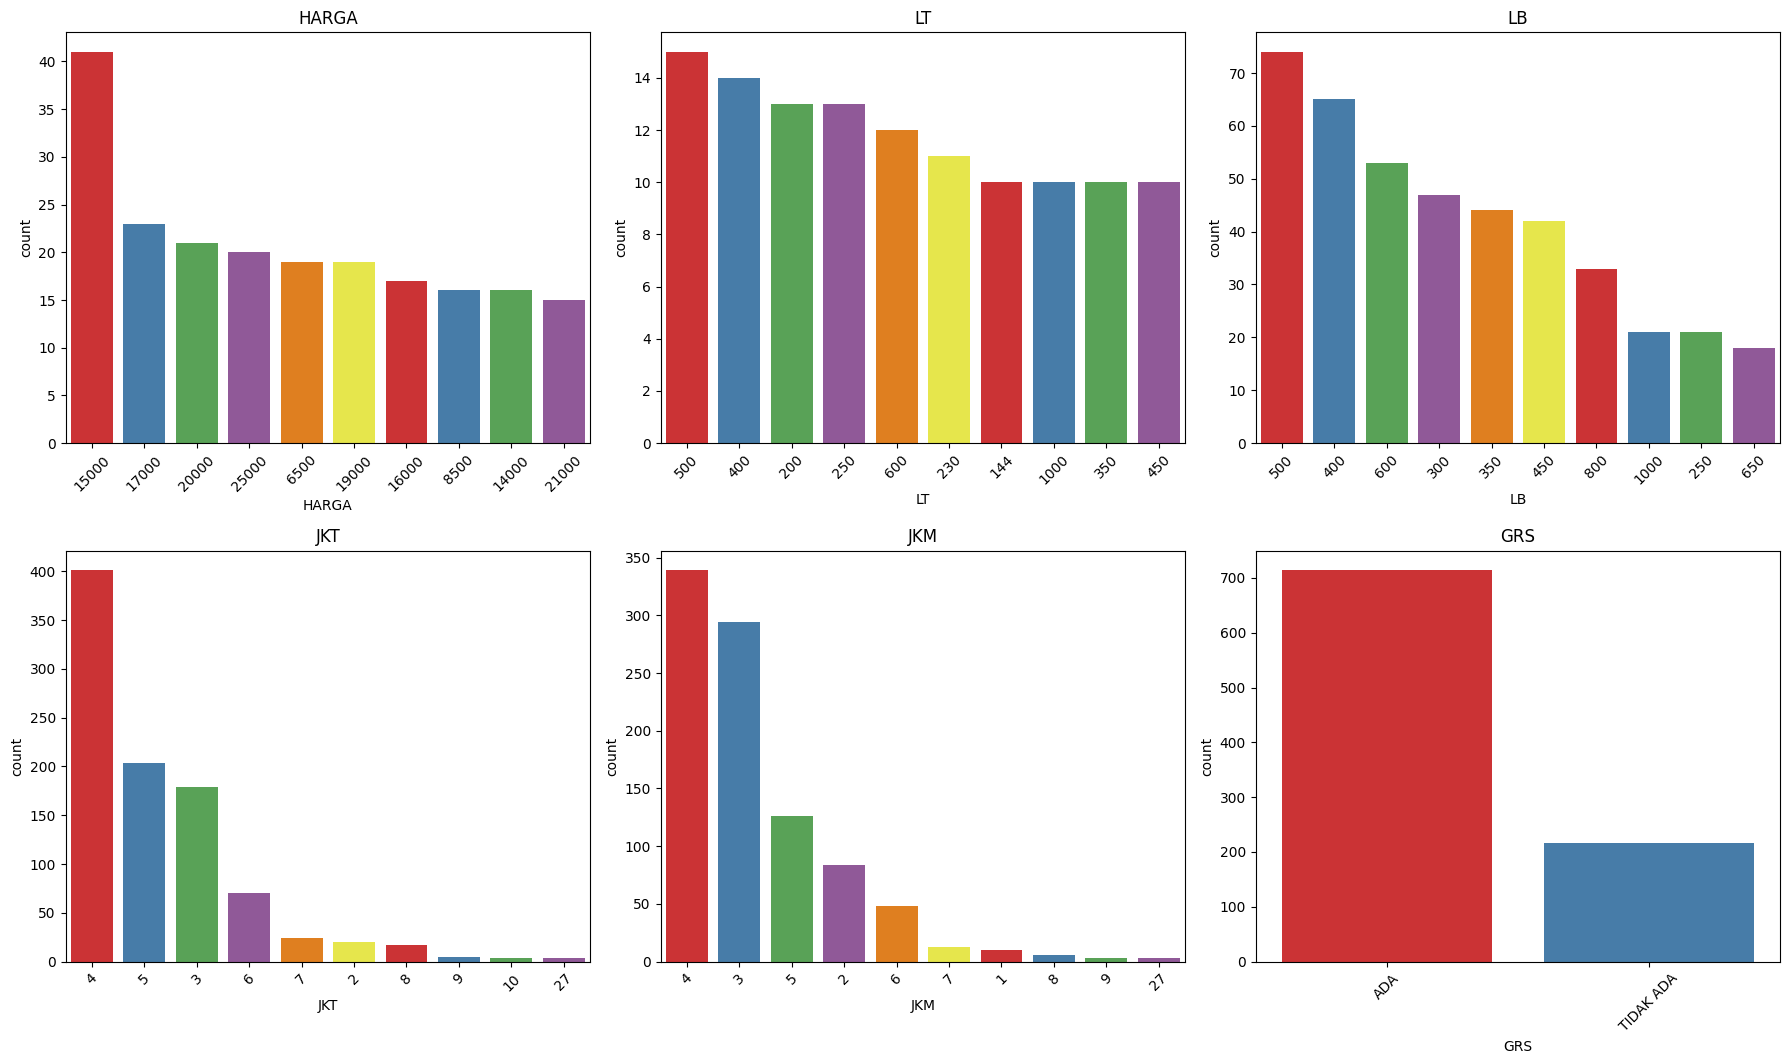

In [40]:
color_palette = sns.color_palette("Set1", len(df.columns))

n_cols = 3
n_rows = (len(df.columns) // n_cols) + 1

plt.figure(figsize=(18, n_rows * 5))

for i, column in enumerate(df.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    
    top_10_items = df[column].value_counts().nlargest(10).index
    
    filtered_df = df[df[column].isin(top_10_items)]
    
    sns.countplot(data=filtered_df, x=column, palette=color_palette, order=top_10_items)
    plt.title(column)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

/tmp/ipykernel_12672/1245511591.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column, kde=True, palette='Set1', element='step')
/tmp/ipykernel_12672/1245511591.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column, kde=True, palette='Set1', element='step')
/tmp/ipykernel_12672/1245511591.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column, kde=True, palette='Set1', element='step')
/tmp/ipykernel_12672/1245511591.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column, kde=True, palette='Set1', element='step')
/tmp/ipykernel_12672/1245511591.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column, kde=True, palette='Set1', element='step')
/tmp/ipykernel_12672/1245511591.py:9: UserWar

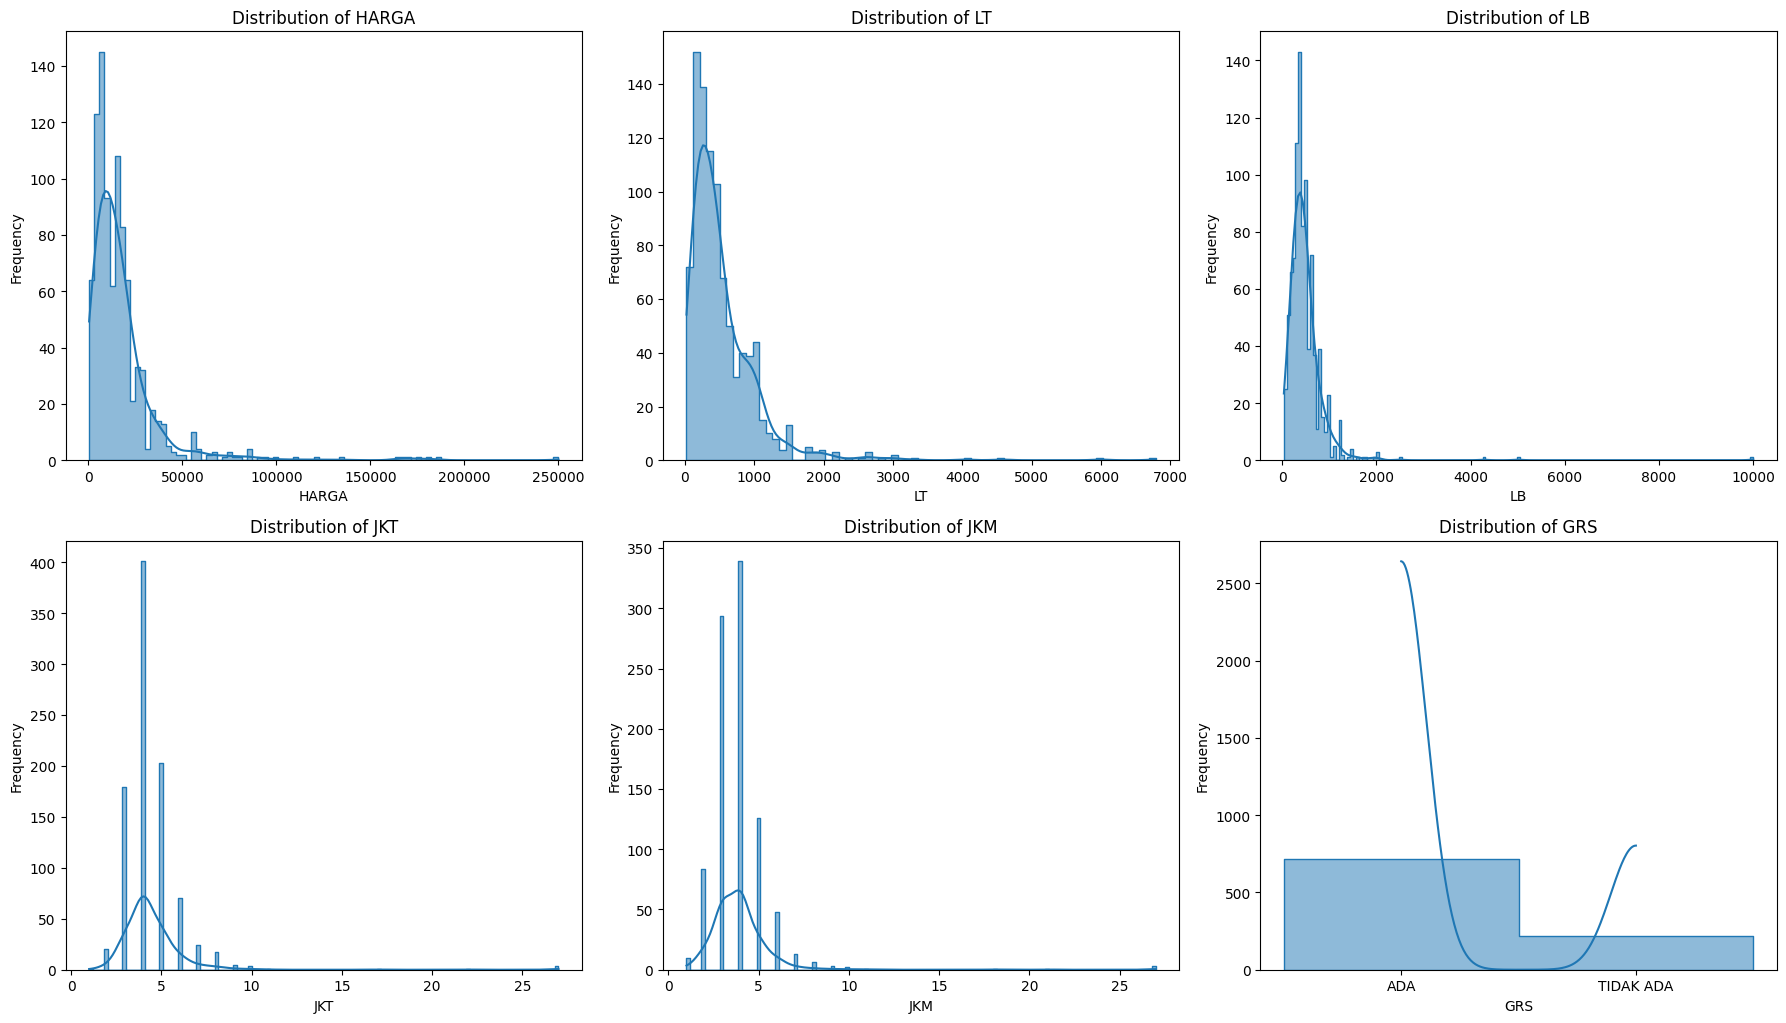

In [41]:
n_cols = 3
n_rows = (len(df.columns) // n_cols) + 1

plt.figure(figsize=(18, n_rows * 5))

for i, column in enumerate(df.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    
    sns.histplot(data=df, x=column, kde=True, palette='Set1', element='step')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [42]:
df['GRS'] = df['GRS'].apply(lambda x: 1 if str(x).strip().upper() == 'ADA' else 0)
df.head()

,HARGA,LT,LB,JKT,JKM,GRS
0,28000,1100,700,5,6,1
1,19000,824,800,4,4,1
2,4700,500,400,4,3,1
3,4900,251,300,5,4,1
4,28000,1340,575,4,5,1


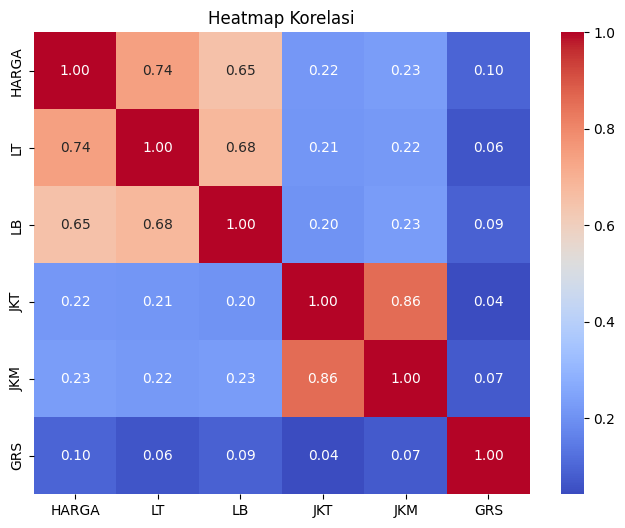

In [43]:
corr = df.corr()

# Gambar heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

### Data Modeling

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
# Persiapan data
data = df.dropna(subset=['LT', 'LB', 'JKT', 'HARGA'])
#merubah category menjadi angka 1 dan 0
df['GRS'] = df['GRS'].apply(lambda x: 1 if str(x).strip().upper() == 'ADA' else 0)

X = data[['LT', 'LB', 'JKT','GRS']]
y = data['HARGA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

# Persiapan data (asumsikan df sudah bersih dan ada kolom HARGA, LT, LB, JKT)
df = df.dropna(subset=['HARGA', 'LT', 'LB', 'JKT'])

# Feature engineering: buat fitur rasio dan polinomial
df['LB_LT_ratio'] = df['LB'] / df['LT']
features = ['LT', 'LB', 'JKT', 'LB_LT_ratio']

X = df[features]
y = np.log1p(df['HARGA'])  # log transform target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline preprocessing dan model
numeric_features = features
numeric_transformer = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42))
])

# Latih model
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)  # kembalikan ke skala asli
y_true = np.expm1(y_test)

mae = mean_absolute_error(y_true, y_pred)
print(f'MAE setelah tuning dan feature engineering: {mae:.2f}')


MAE setelah tuning dan feature engineering: 7906.99


In [47]:
import numpy as np
# Data sepertinya mengandung banyak outlier
Q1 = df['HARGA'].quantile(0.25)
Q3 = df['HARGA'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Buang data di luar batas tersebut (outlier)
df_filtered = df[(df['HARGA'] >= lower_bound) & (df['HARGA'] <= upper_bound)].copy()
print(f'Jumlah data setelah buang outlier: {len(df_filtered)}')


Jumlah data setelah buang outlier: 871


In [48]:
df_filtered['LB_LT_ratio'] = df_filtered['LB'] / df_filtered['LT']
df_filtered['LT_squared'] = df_filtered['LT'] ** 2
df_filtered['LB_squared'] = df_filtered['LB'] ** 2
df_filtered['JKT_squared'] = df_filtered['JKT'] ** 2

features = ['LT', 'LB', 'JKT', 'LB_LT_ratio', 'LT_squared', 'LB_squared', 'JKT_squared']

### Kenapa melakukan ini?
Feature Engineering: Ini adalah proses menciptakan fitur baru dari data asli agar model machine learning atau analisis statistik bisa menangkap pola yang lebih kompleks.

Dengan menambah fitur rasio dan kuadrat, kamu memperkaya representasi data sehingga model bisa belajar hubungan yang lebih baik dan mungkin meningkatkan akurasi prediksi harga rumah.

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.metrics import r2_score

X = df_filtered[features]
y = np.log1p(df_filtered['HARGA'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer([
    ('scaler', StandardScaler(), features)
])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(
        n_estimators=1000,
        learning_rate=0.005,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
])

model.fit(X_train, y_train)
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

mae = mean_absolute_error(y_true, y_pred)
print(f'MAE : {mae:.2f}')

r2 = r2_score(y_true, y_pred)
print(f'R² Score: {r2:.4f}')



MAE : 3150.94
R² Score: 0.7165


     Actual Harga  Predicted Harga
436        7900.0     12651.620117
69         5200.0      3118.640625
558       15000.0     18209.791016
70        14000.0     13474.337891
984        1450.0      1417.032593
883        4500.0      3095.204834
90        20000.0     14533.688477
926       28000.0     18083.726562
686       25000.0     27881.671875
524        5100.0      5452.092285


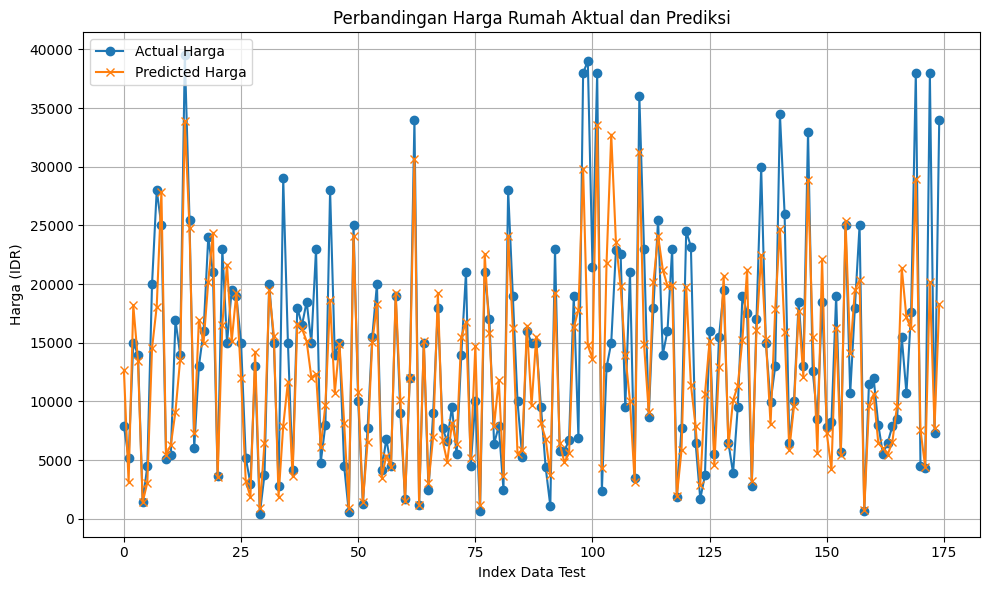

In [50]:
# Buat DataFrame hasil prediksi dan nilai asli
results_df = pd.DataFrame({
    'Actual Harga': y_true,
    'Predicted Harga': y_pred
})

# Cetak data prediksi dan aktual (bisa dibatasi contoh 10 baris)
print(results_df.head(10))

# Plot perbandingan Actual vs Predicted
plt.figure(figsize=(10,6))
plt.plot(results_df['Actual Harga'].values, label='Actual Harga', marker='o')
plt.plot(results_df['Predicted Harga'].values, label='Predicted Harga', marker='x')
plt.title('Perbandingan Harga Rumah Aktual dan Prediksi')
plt.xlabel('Index Data Test')
plt.ylabel('Harga (IDR)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [51]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

X = df_filtered[features]
y = np.log1p(df_filtered['HARGA'])

kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores = []
r2_scores = []
models = []

# Variabel untuk simpan data dan prediksi fold terbaik
X_test_best = None
y_test_best = None
y_pred_best = None

for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    preprocessor = ColumnTransformer([
        ('scaler', StandardScaler(), features)
    ])
    
    model = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', XGBRegressor(
            n_estimators=1000,
            learning_rate=0.005,
            max_depth=5,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42
        ))
    ])
    
    model.fit(X_train, y_train)
    
    y_pred_log = model.predict(X_test)
    y_pred = np.expm1(y_pred_log)
    y_true = np.expm1(y_test)
    
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    mae_scores.append(mae)
    r2_scores.append(r2)
    models.append(model)
    
    # Simpan data test dan prediksi jika ini fold terbaik (sementara)
    if i == 0:  # sementara simpan fold pertama, nanti diganti dengan best_index
        X_test_best = X_test
        y_test_best = y_true
        y_pred_best = y_pred

# Cari indeks model dengan MAE terkecil
best_index = np.argmin(mae_scores)
best_model = models[best_index]

# Simpan ulang data test dan prediksi fold terbaik sesuai best_index
for i, (train_index, test_index) in enumerate(kf.split(X)):
    if i == best_index:
        X_test_best = X.iloc[test_index]
        y_test_best = np.expm1(y.iloc[test_index])
        y_pred_log = best_model.predict(X_test_best)
        y_pred_best = np.expm1(y_pred_log)
        break

print(f'Average MAE over 5 folds: {np.mean(mae_scores):.2f} ± {np.std(mae_scores):.2f}')
print(f'Average R² over 5 folds: {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}\n')
print(f'Best fold index: {best_index}')
print(f'Best fold MAE: {mae_scores[best_index]:.2f}')
print(f'Best fold R²: {r2_scores[best_index]:.4f}')




Average MAE over 5 folds: 3224.63 ± 197.35
Average R² over 5 folds: 0.6857 ± 0.0488

Best fold index: 1
Best fold MAE: 2897.44
Best fold R²: 0.7420


   Actual Harga  Predicted Harga
0        4700.0     11629.035156
1        7600.0      7735.958984
2        5250.0     10706.532227
3        8500.0      6144.236816
4        5800.0      5754.561035
5       25000.0     18308.791016
6        9300.0      6526.592285
7       18500.0     18121.710938
8       18500.0     16625.972656
9       25000.0     25017.785156


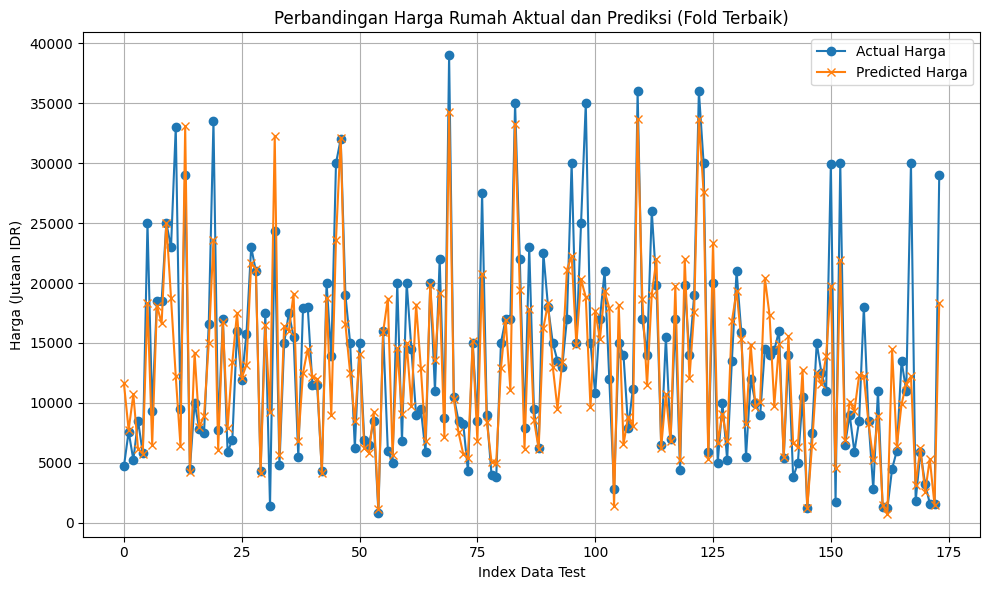

In [52]:
# Buat DataFrame hasil prediksi dan nilai asli untuk fold terbaik
results_df = pd.DataFrame({
    'Actual Harga': y_test_best.values,
    'Predicted Harga': y_pred_best
})

# Tampilkan 10 baris pertama hasil prediksi dan aktual
print(results_df.head(10))

# Plot perbandingan Actual vs Predicted untuk fold terbaik
plt.figure(figsize=(10,6))
plt.plot(results_df['Actual Harga'].values, label='Actual Harga', marker='o')
plt.plot(results_df['Predicted Harga'].values, label='Predicted Harga', marker='x')
plt.title('Perbandingan Harga Rumah Aktual dan Prediksi (Fold Terbaik)')
plt.xlabel('Index Data Test')
plt.ylabel('Harga (Jutaan IDR)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Kesimpulan
saya telah melakukan pembersihan data dari outlier menggunakan metode IQR serta menambah fitur baru seperti rasio dimensi dan fitur kuadrat. Hasilnya lebih baik dengan menggunakan XGBRegressor. Saya Juga mencoba untuk menggunakan K-fold Cross Validation untuk mendapatkan hasil MAE dan R2-score yang lebih baik. Score yang bisa saya dapat dalam memprediksi data tersebut sekitar 3224.63 ± 197.35 dalam MAE dan 0.6857 ± 0.0488 dalam R2.

Model dengan score terbaik adalah model yang saya gambar di akhir, dan mendapatkan score sekitar : 
- Best fold MAE: 2897.44
- Best fold R²: 0.7420